In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
from top2vec import Top2Vec

/var/folders/np/2w7pjcsn7zb7bhhthh431c2w0000gp/T/ipykernel_7257/2900118689.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yixiao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/yixiao/opt/anaconda3/envs/top2vec/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-01-20 11:36:57.083345: I tensorflow/core/platform/cpu_fe

In [3]:
df = pd.read_json('train_reviews.json')
df.head()

,date,title,text,url,stars
0,2015-10-10 14:32:51+00:00,Bad customer service. Staff are very impolite ...,Used national rail twice and on both occasions...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
1,2015-09-22 17:04:56+00:00,Pretty awful service,I phoned National rail to find out why several...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
2,2015-03-13 23:37:05+00:00,Awful staff,I travel from Brokenhast to southampton centra...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
3,2015-01-13 12:26:52+00:00,Very good,Saved about £50 on a single trip using Nationa...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium
4,2011-05-28 15:00:36+00:00,Check it out.,I always use the national rail enquiry site wh...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium


In [4]:
# clearning the data
df = df.dropna(axis=0)
unique_df = df.drop_duplicates(subset=['text'])
unique_df = unique_df.reset_index(drop=True)

In [5]:
unique_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    1437 non-null   datetime64[ns, UTC]
 1   title   1437 non-null   object             
 2   text    1437 non-null   object             
 3   url     1437 non-null   object             
 4   stars   1437 non-null   object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 56.3+ KB


In [6]:
def preprocessor(text):
    preprocessed_text = re.sub('<[^>]*>','',text) # removing all the HTLM makeup
    # text = re.sub(r'[^\w\s]','',text) # removing all the punctuations
    # text = re.sub(r'[0-9]','',text)# removing all the digit number
    preprocessed_text = preprocessed_text.lower() # lowcase all the words
    # w_ls = [w for w in word_tokenize(text)]
    # w_ls = [w for w in w_ls if w not in stop] # removing all the stop words
    # w_ls_pos = nltk.pos_tag(w_ls)
    # w_ls =[w[0] for w in w_ls_pos if w[1] in ['NN','VBP']] # filtering the words that are not noun and verb
    # text = ' '.join([lemmatizer.lemmatize(w) for w in w_ls]) # lemmatize all the words
    return preprocessed_text

In [7]:
def removing_named_entities(text):
    new_text = nlp(text)
    new_text = (" ".join([ent.text for ent in new_text if not ent.ent_type_]))
    return new_text

In [8]:
# stop=set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()
nlp = spacy.load('en_core_web_sm')

preprocessed_review = unique_df['text'].apply(preprocessor).values.tolist()
preprocessed_review = unique_df['text'].apply(removing_named_entities).values.tolist()

In [ ]:
preprocessed_model = Top2Vec(preprocessed_review,
                             embedding_model = 'all-MiniLM-L6-v2',
                             ngram_vocab=True) #embedding_model='universal-sentence-encoder,embedding_model = 'all-MiniLM-L6-v2'')

2024-01-20 11:37:47,470 - top2vec - INFO - Pre-processing documents for training
/Users/yixiao/opt/anaconda3/envs/top2vec/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-01-20 11:37:47,909 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model


In [9]:
topic_words,word_scores,topic_nums = preprocessed_model.get_topics()
for word,score,num in zip(topic_words,word_scores,topic_nums):
    print(num)
    print(word)

0
['trains are' 'virgin trains' 'trains' 'train' 'connecting train'
 'train manager' 'next train' 'return ticket' 'ticket' 'rail'
 'rail company' 'passengers' 'new ticket' 'ticket office' 'class ticket'
 'ticket prices' 'ticket inspector' 'southern rail' 'carriages' 'tickets'
 'bought tickets' 'terrible service' 'travelled from' 'national rail'
 'return journey' 'travelled' 'rubbish service' 'station' 'delayed'
 'delay repay' 'poor service' 'other passengers' 'journey' 'at station'
 'travelling' 'worst customer' 'seat reservations' 'reserved seat'
 'delays' 'trip' 'seat reservation' 'been cancelled' 'rude staff'
 'reserved seats' 'before departure' 'delayed by' 'reserve seats' 'travel'
 'refund' 'get refund']
1
['terrible service' 'worst customer' 'poor service' 'rubbish service'
 'customer service' 'terrible' 'rude staff' 'bad' 'awful' 'service'
 'worst' 'complaint' 'customer' 'extremely rude' 'customer services'
 'customer care' 'very rude' 'rude' 'even worse' 'called customer' 'poor

In [10]:
preprocessed_model.get_num_topics()

2

In [63]:
preprocessed_model.hierarchical_topic_reduction(num_topics=4)

[[4, 0], [1], [2], [5, 3]]

In [28]:
len(set(docs))

1437

In [64]:
documents, document_scores, document_ids = preprocessed_model.search_documents_by_topic(topic_num=2, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")

Document: 1303, Score: 0.853267252445221
-----------
Purchased return to from ( not class ) . On way out   train so crowded people were having to sit in the aisles - so no access to either toilet or purchase of a drink ( 4hr+ journey ) . On way back , all the seats appears to have been previously reserved - although many people simply did n't turn up / use the reserved seats . This produced ' seat rage ' as people getting on saw others in " their " seats and thought they were n't going to get ' their seat ' - everyone was and gave up seats when asked , but what a carry - on . They do n't seem to reserve seats like this on trains , probably because it does n't work in practice ! Next time I 'll give up on my ' green ' credentials and just drive - half the cost and of the hassle .
-----------
Document: 1377, Score: 0.8079740405082703
-----------
Terrible . Booked a train to to find out it was cancelled . Booked an alternative , no seat reservations , and had to change at and go across to

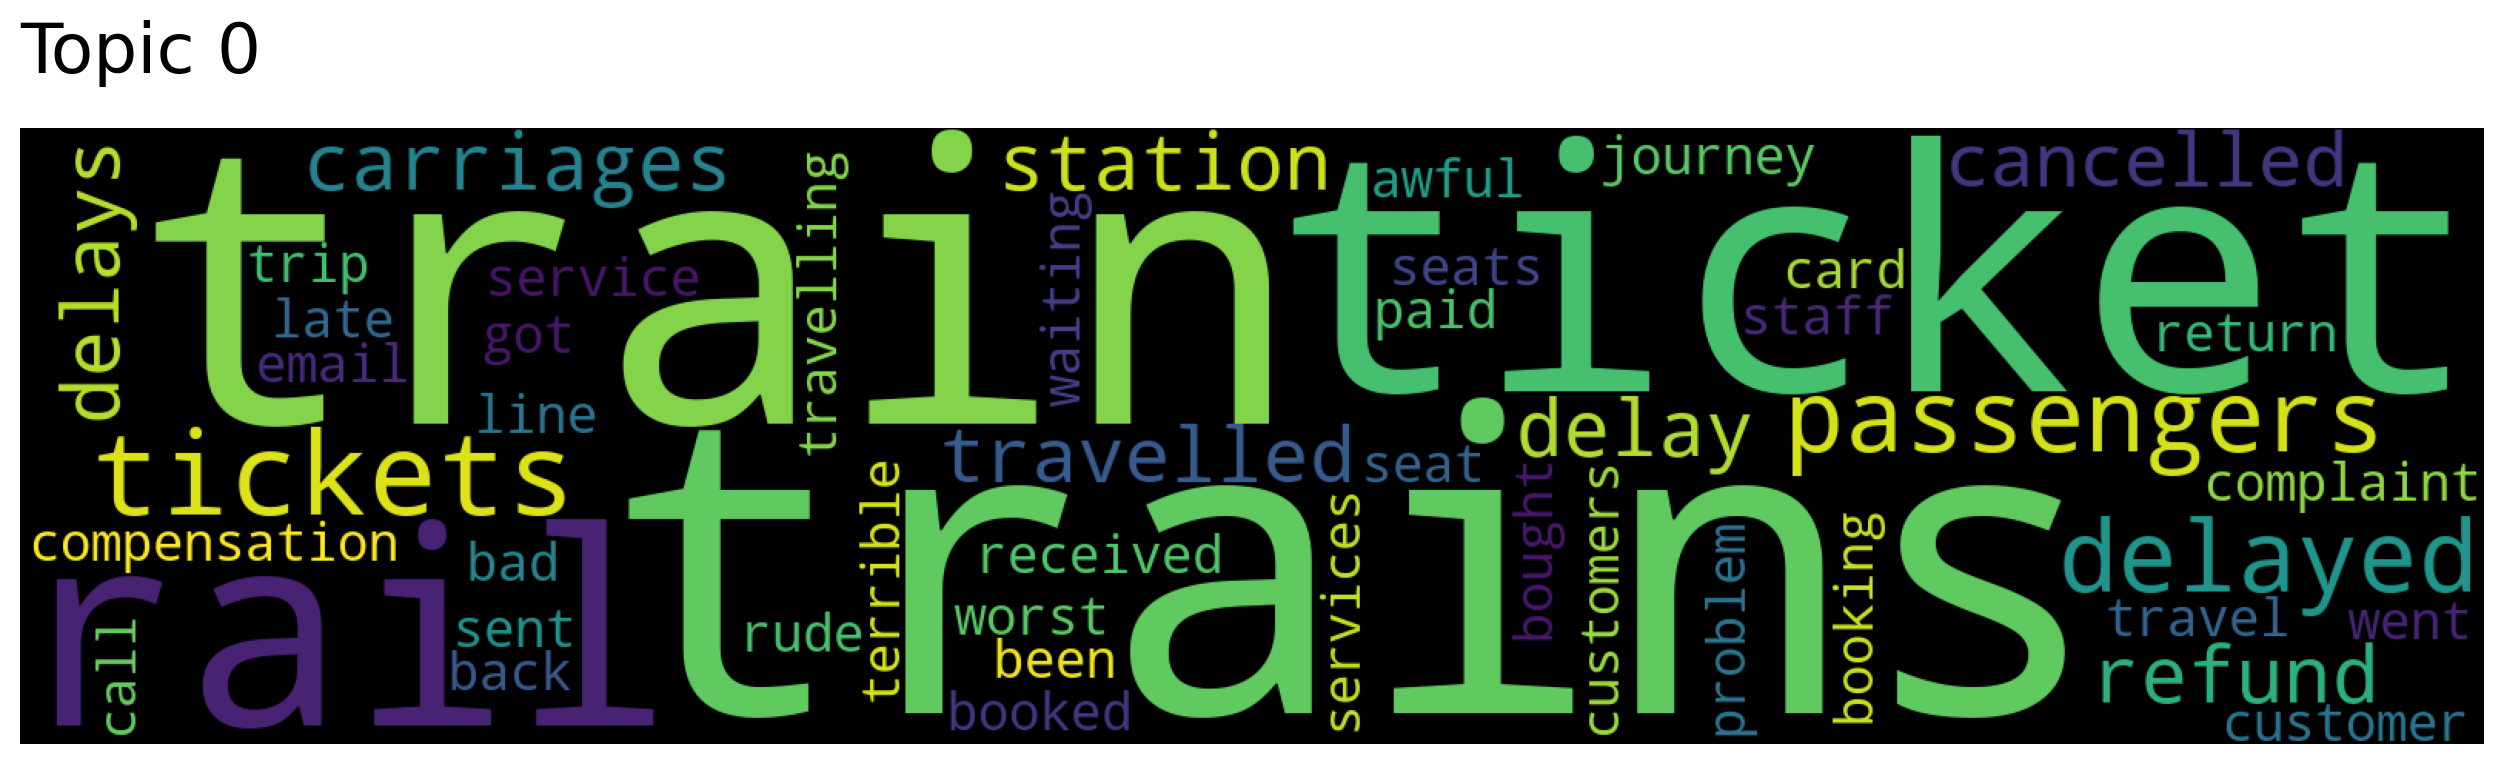

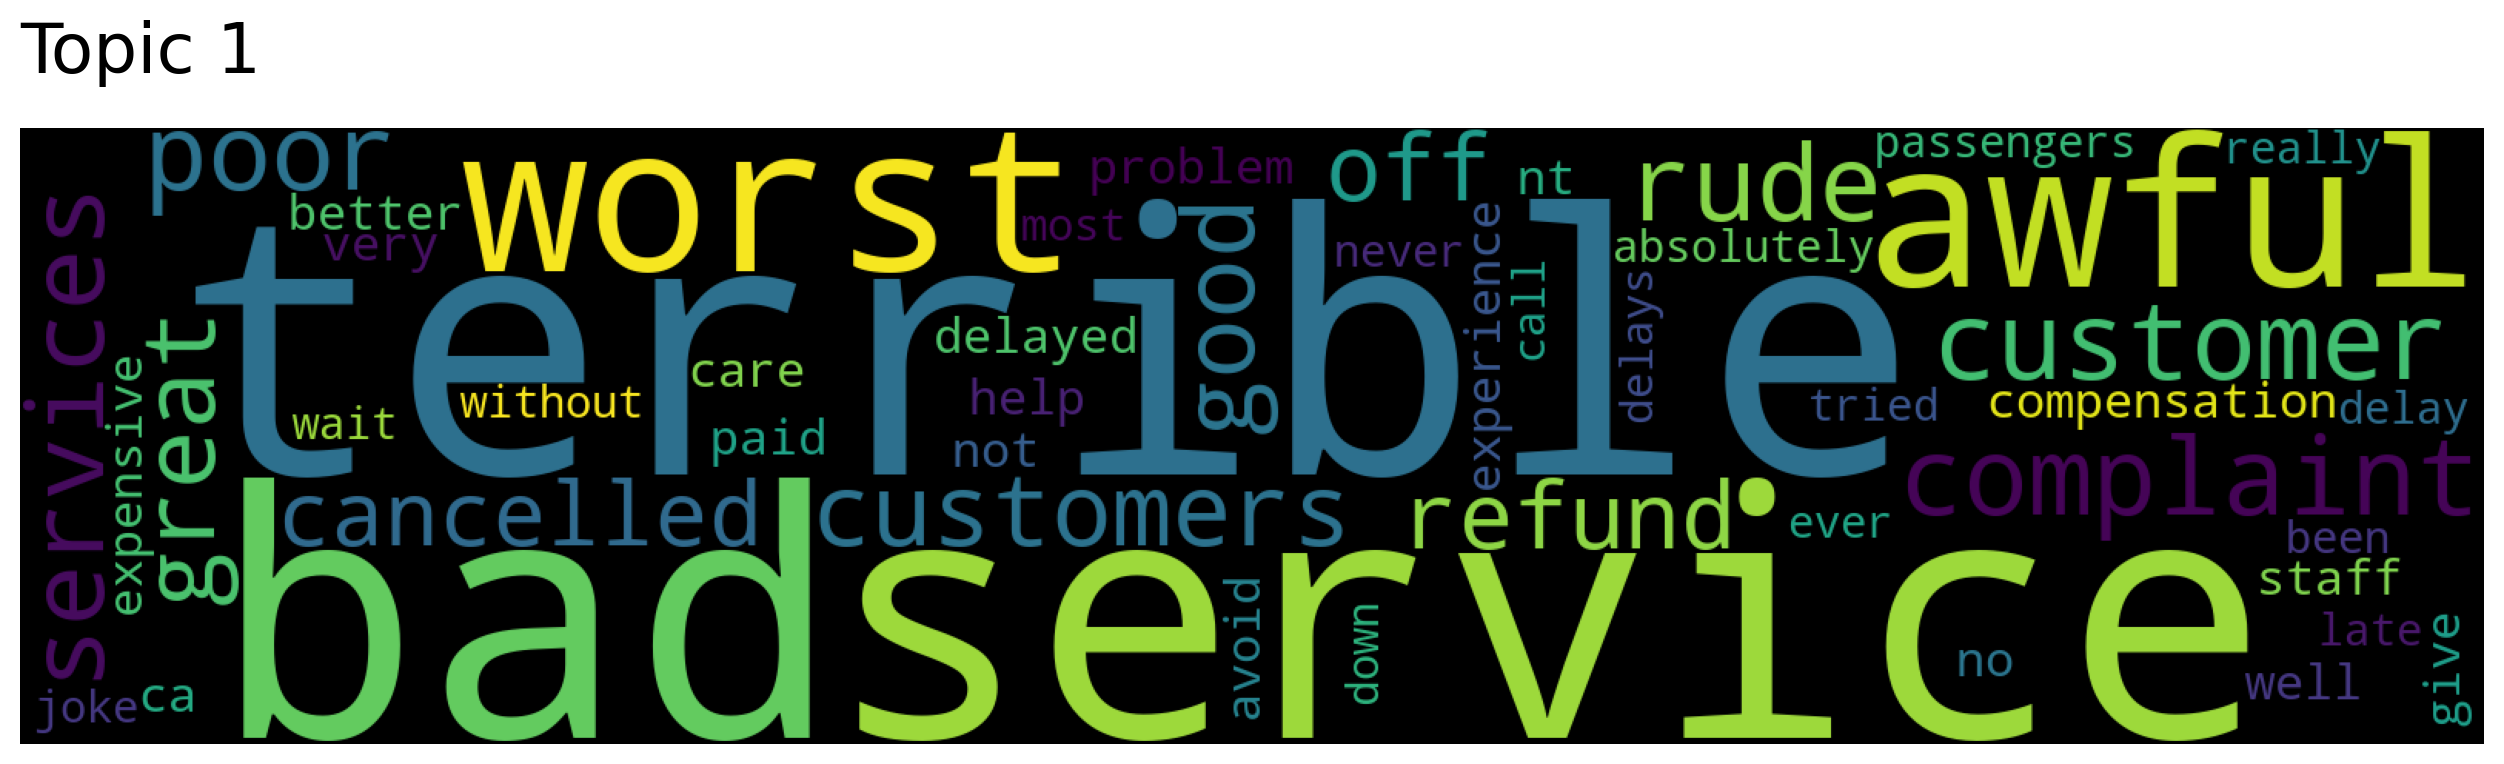

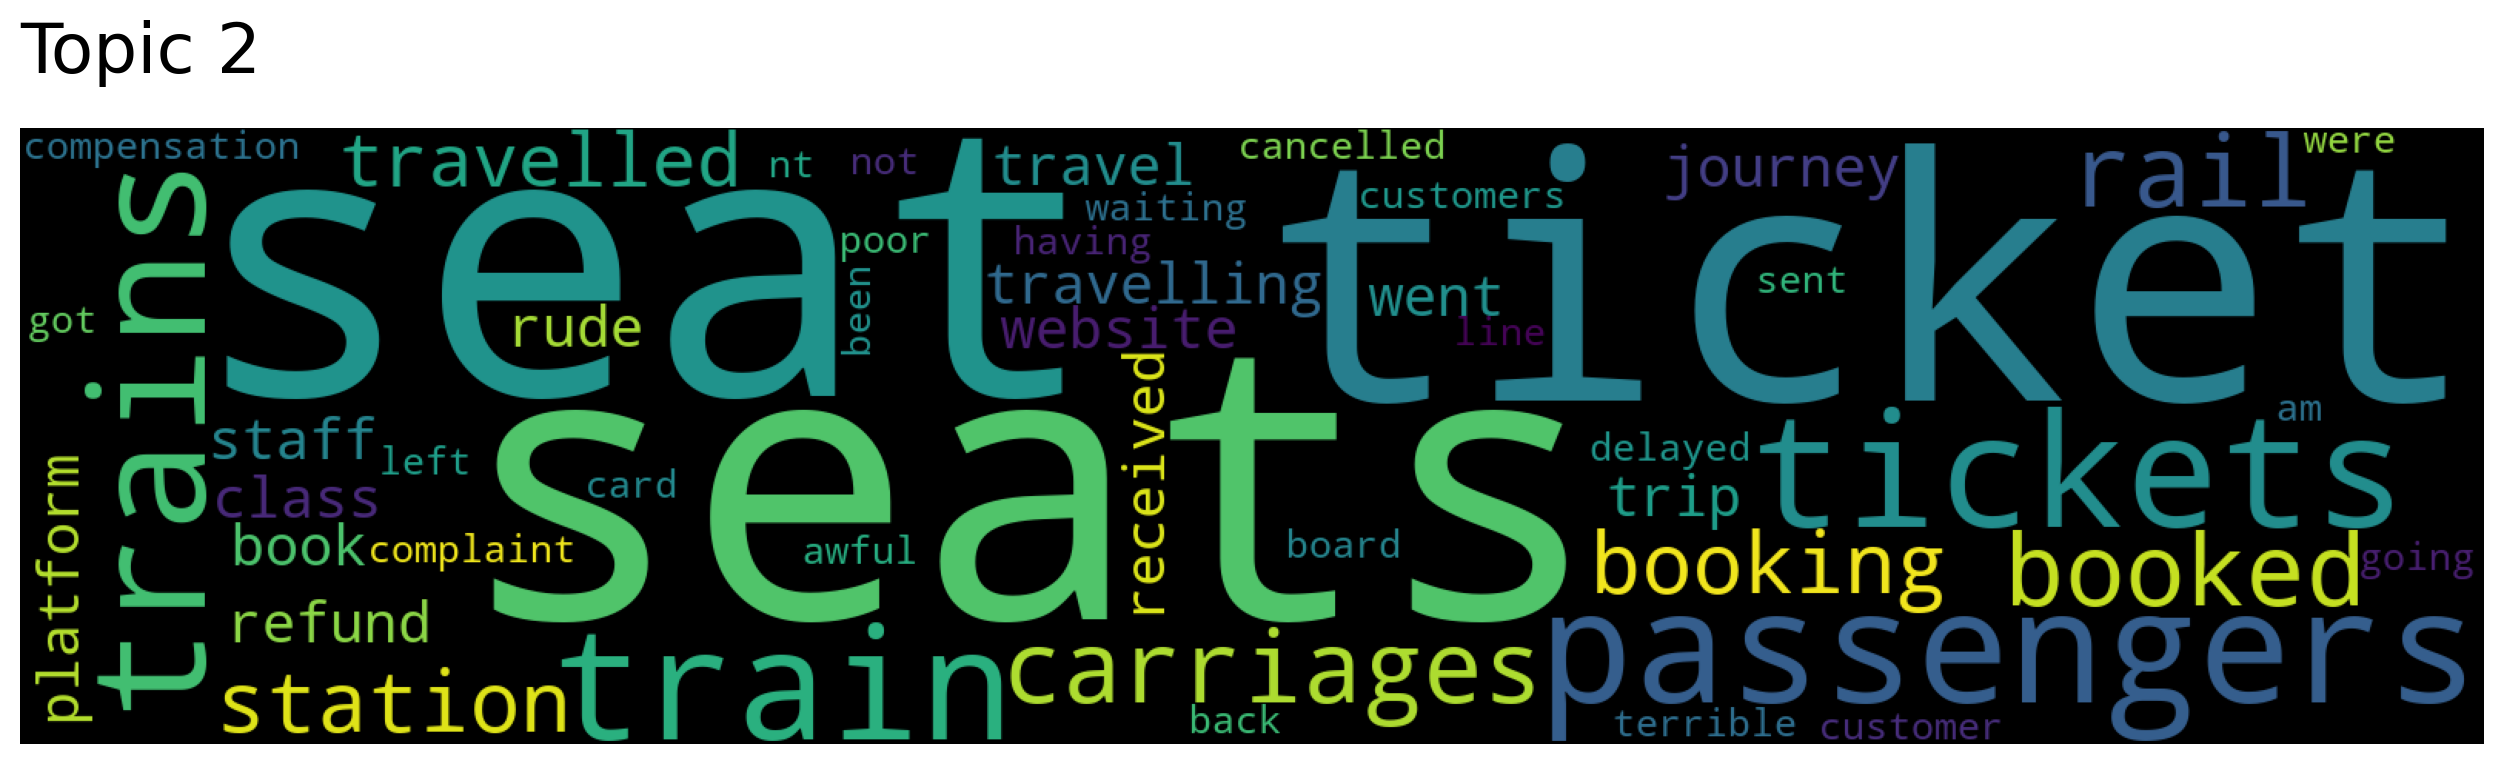

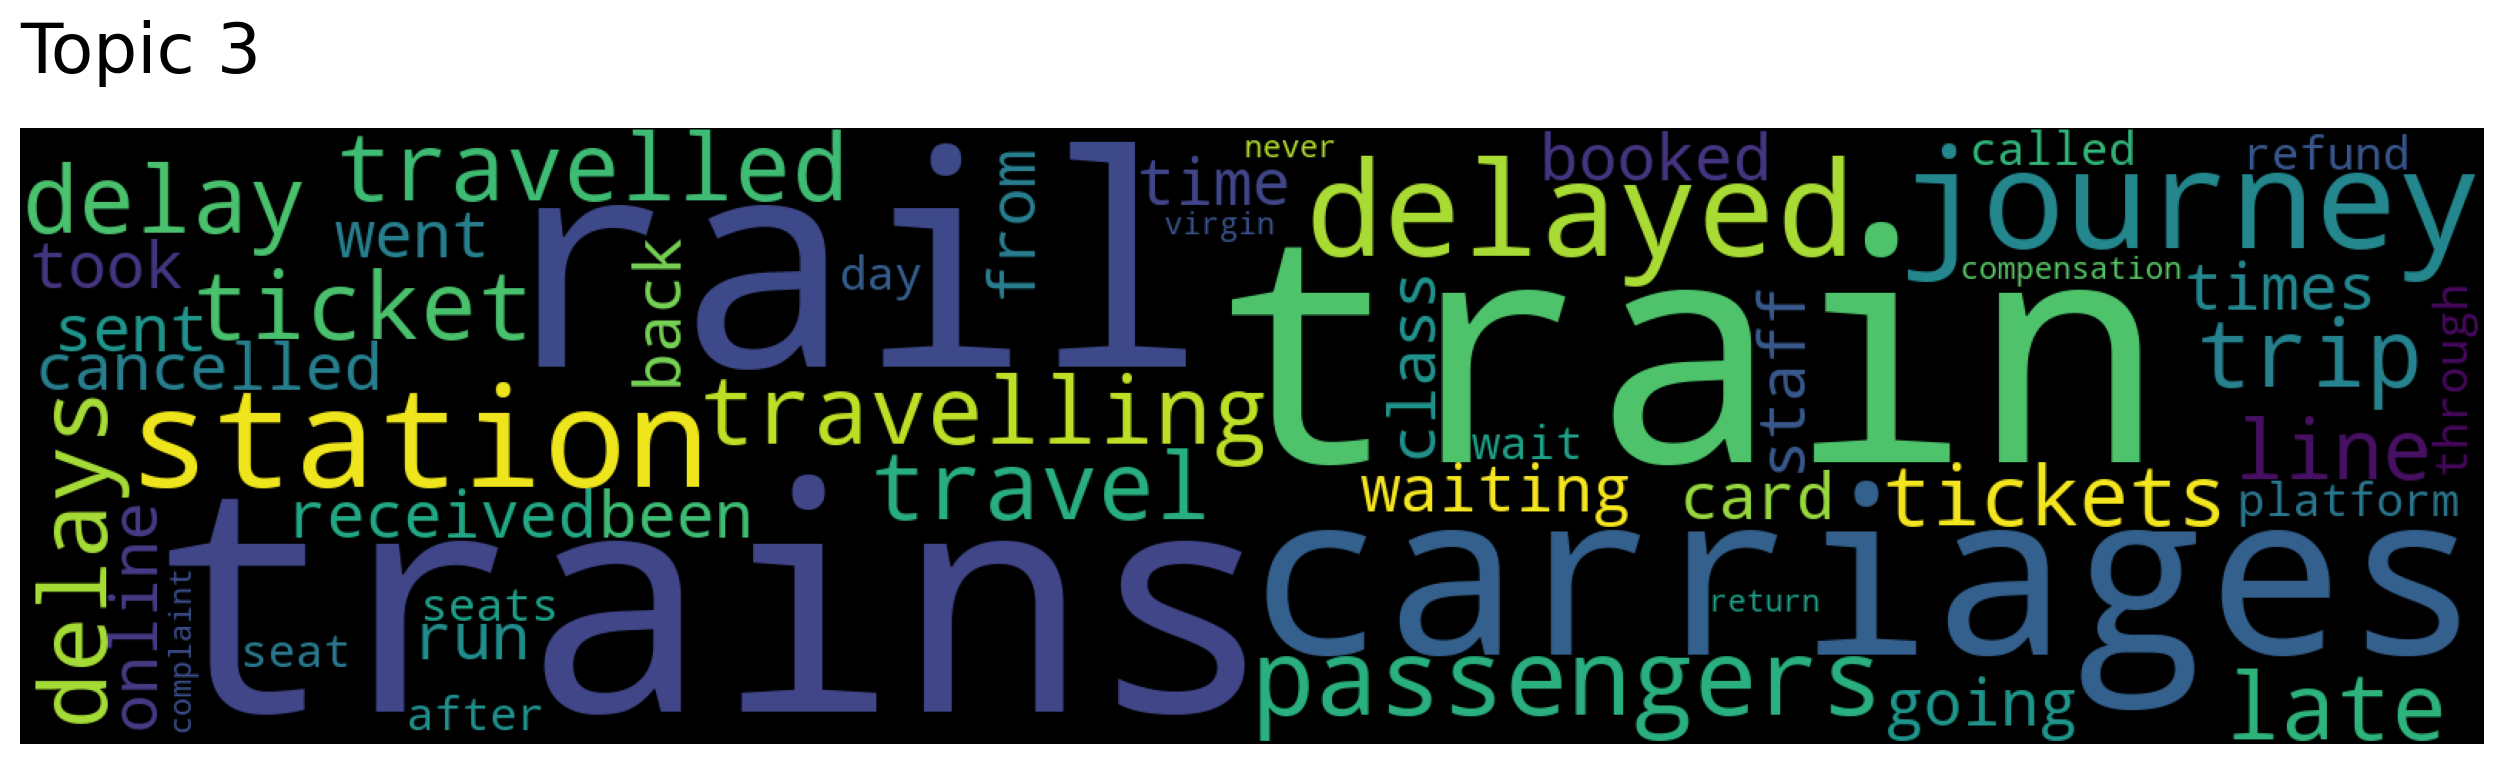

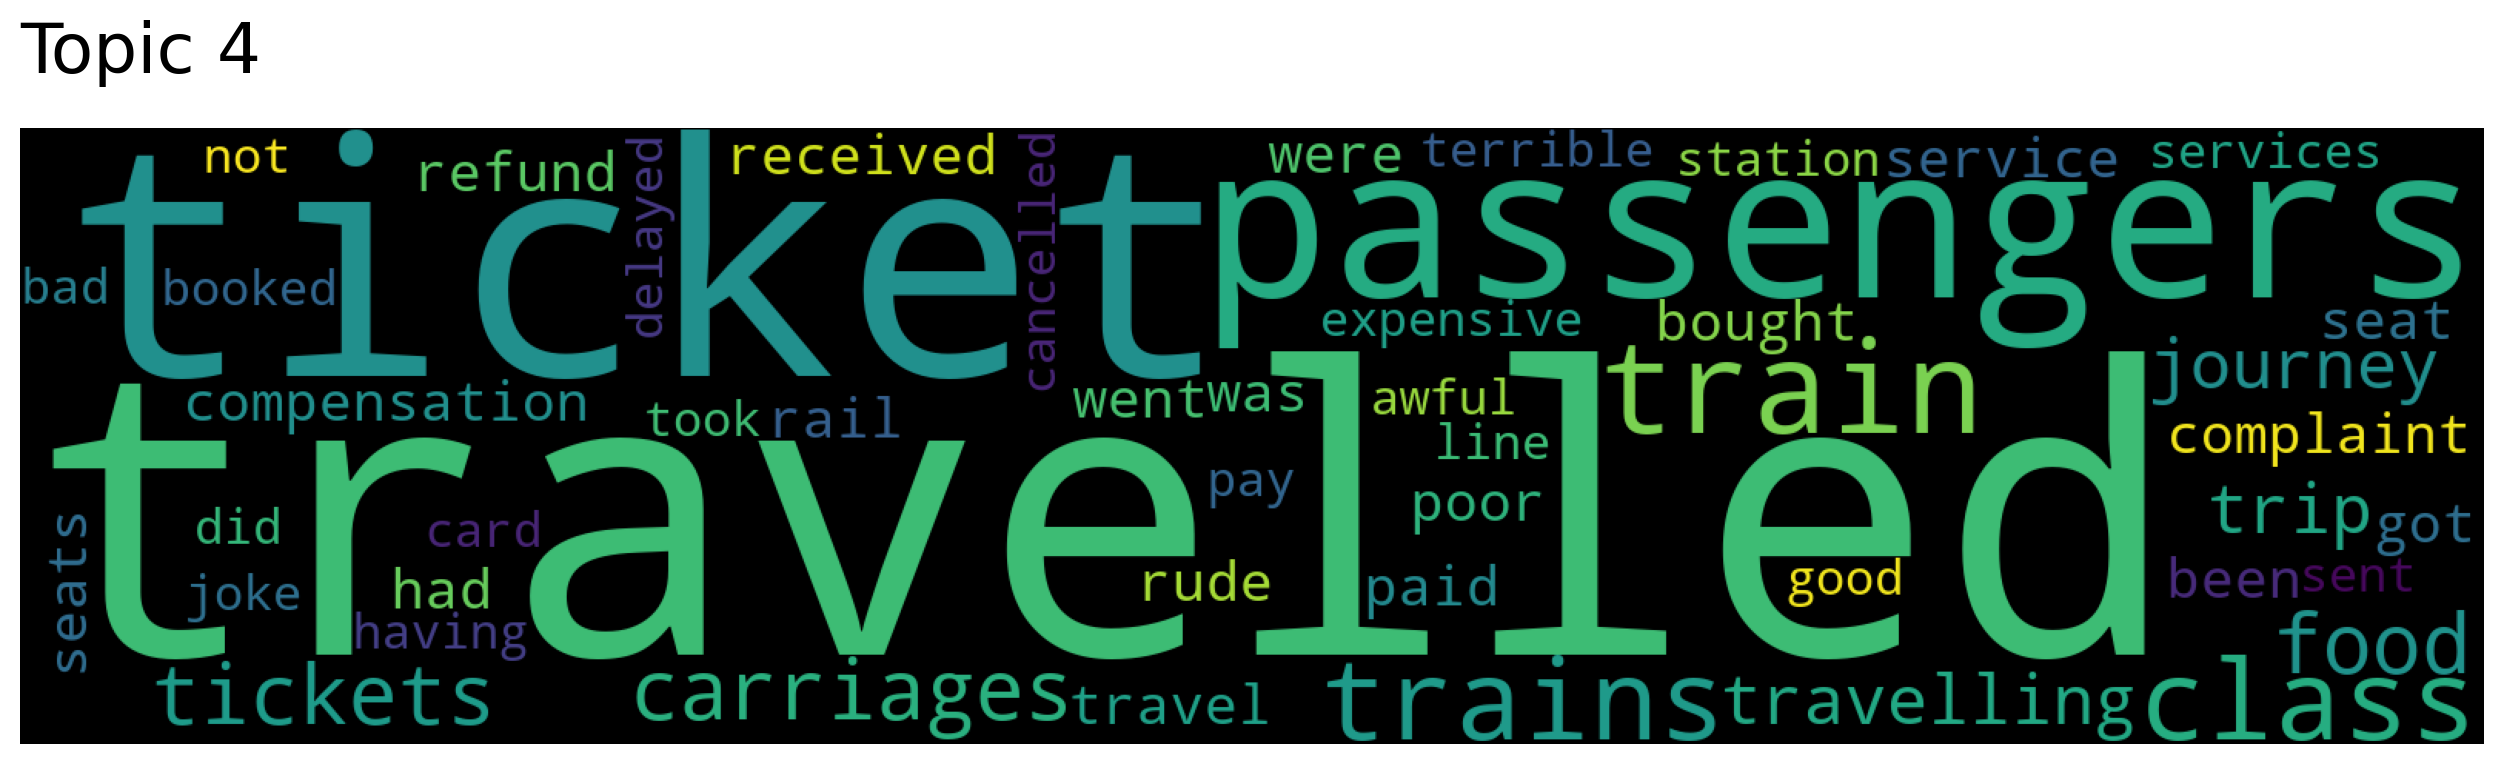

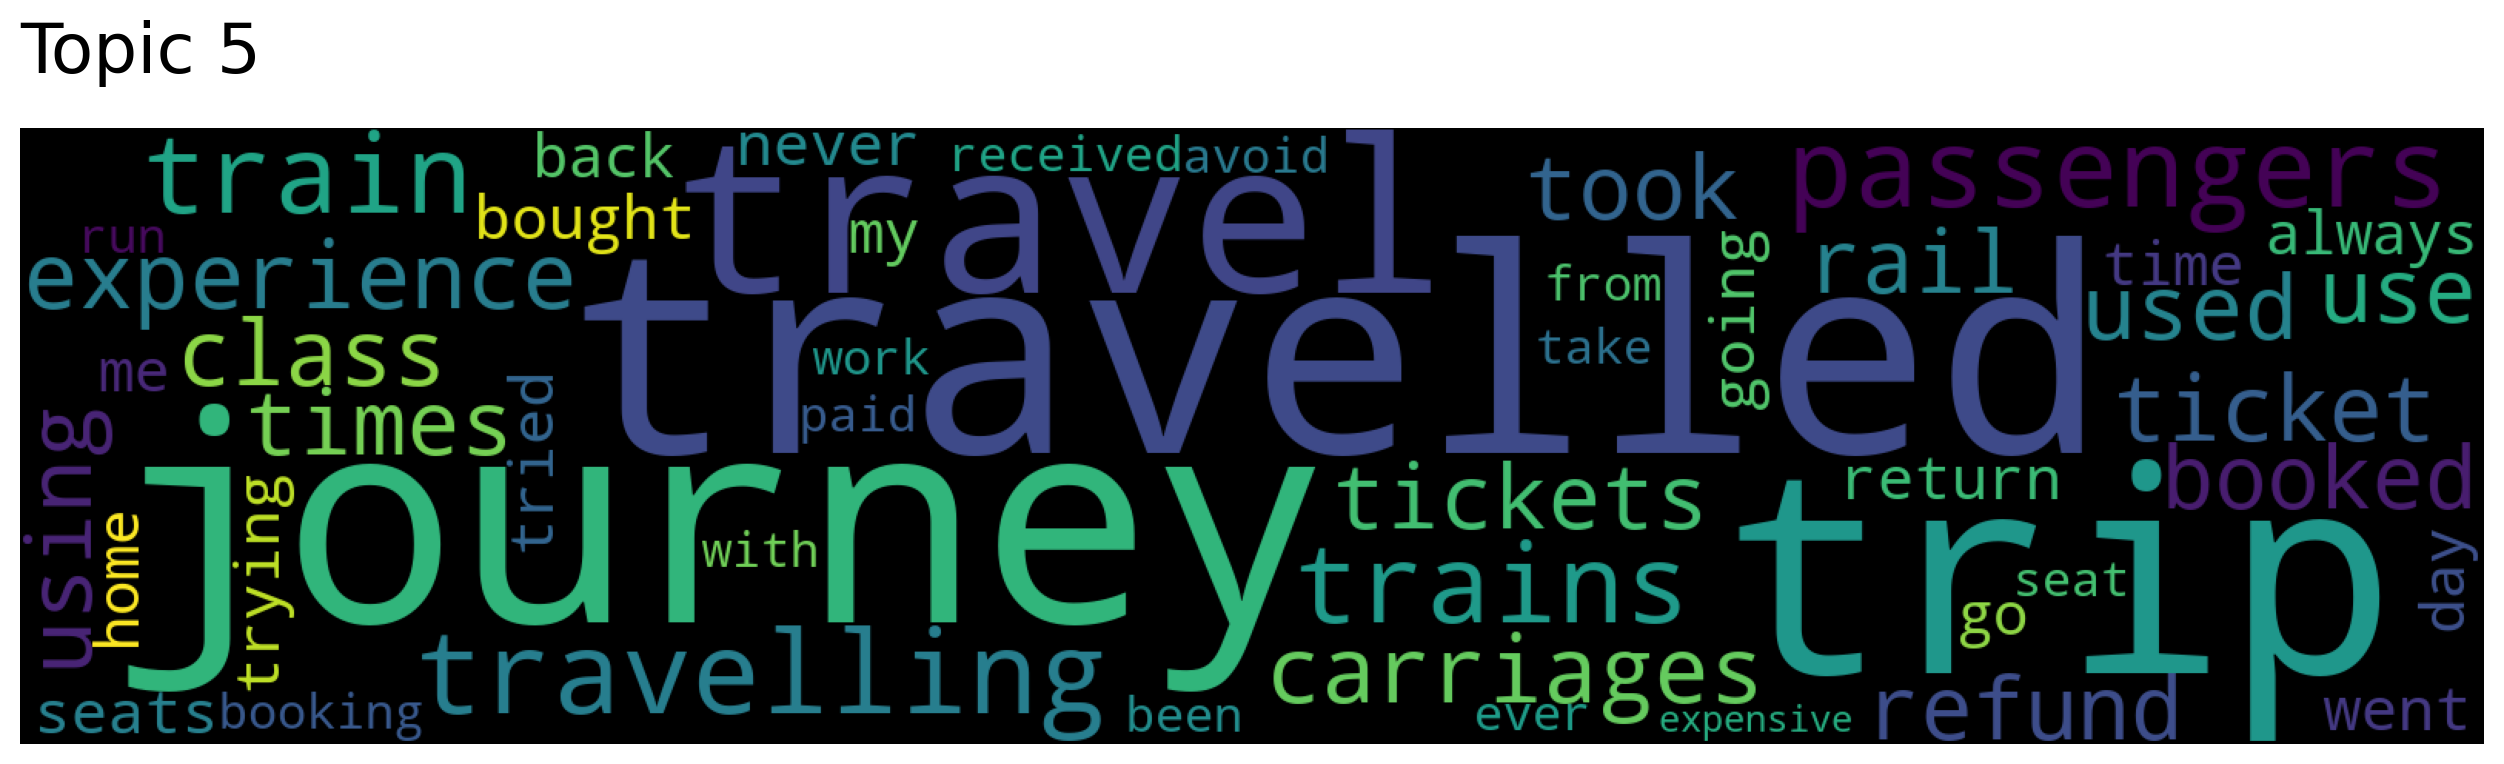

In [65]:

for topic in range(preprocessed_model.get_num_topics()):
    preprocessed_model.generate_topic_wordcloud(topic)

In [67]:
preprocessed_model.search_documents_by_topic(0,2)

(array(['I returned from after travelling with my to hop on a train in to Exeter with a pre - booked ticket . in , the train manager told me I was on the train than my ticket stated and I was charged a full fare for the trip . When I told him it was a genuine mistake and I did n\'t think it was reasonable to charge me like that on a , it became apparent there was no compassion , empathy or understanding and I was forced to pay up . The train manager did not want to provide his full details , but I told him I would file a complaint as the experience was rather distressing for both me and my . I sent a detailed e - mail and sent my tickets and a complaint form , only to follow - up to hear that \' ticket policy is the policy \' . No refund ... Ah well , so be it then ... From now onwards I will consider taking the train to as a last option over car or bus ... I was amazed that customer service seems to feature very low on \'s list . Many times I have had to contend boarding a train witho

In [76]:
import umap.plot
umap_args_model = {
"n_neighbors": 10,
"n_components": 2,
"metric": "cosine",
'min_dist':0.10,
'spread':1
}
umap_model = umap.UMAP(**umap_args_model).fit(topic_model._get_document_vectors(norm=False))
umap_fig2 = umap.plot.points(umap_model, labels = topic_model.doc_top, theme='fire')

NameError: name 'topic_model' is not defined

In [72]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
import datashader.bundling as bd
import matplotlib.pyplot as plt
import colorcet
import matplotlib.colors
import matplotlib.cm
import bokeh.plotting as bpl
import bokeh.transform as btr
import holoviews as hv
import holoviews.operation.datashader as hd